# Bicicleta de Whipple


Modelo linearizado em torno de uma solução em regime permanente na qual a bicicleta descreve uma translação em linha reta com velocidade \(v\) constante [(Meijaard *et al.*, 2007)](https://dx.doi.org/10.1098/rspa.2007.1857):
\begin{align*}
    M \ddot q = - v C_1 \dot q - (g K_0 + v^2 K_2 ) q + \tau
\end{align*}
com $q = (\phi, \delta) \in \mathbb{R}^2$ e $\tau = (\tau_\phi, \tau_\delta) = (w, u)$.

In [1]:
# !pip install sympy
# !pip install control
# !pip install tbcontrol
# !pip install ipywidgets

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import control as ct
from tbcontrol.symbolic import routh

import ipywidgets as widgets
from ipywidgets import interactive

In [3]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

## Sistema na forma de espaço de estados

\begin{align*}
    & \dot x = A(v) x + B u + E w \\ 
    & y = C x
\end{align*}

In [4]:
v = sp.symbols('v')

M = sp.Matrix([[80.81722, 2.31941332208709],
              [2.31941332208709, 0.29784188199686]])

K0 = sp.Matrix([[-80.95,-2.59951685249872],
                [-2.59951685249872,-0.80329488458618]])

K2 = sp.Matrix([[0,76.59734589573222],
                [0,2.65431523794604]])

C1 = sp.Matrix([[0,33.86641391492494],
                [-0.85035641456978,1.68540397397560]])

A = sp.Matrix([[sp.zeros(2,2), sp.eye(2)],
               [- M.inv() * (9.81 * K0 + v * v *K2), -M.inv()*(v*C1)]])

Be = sp.Matrix([[sp.zeros(2,2)],
               [M.inv()]])

B = Be[:, 1]
E = Be[:, 0]

C_φ = sp.Matrix([[1, 0, 0, 0]])
C_δ = sp.Matrix([[0, 1, 0, 0]])

An = sp.lambdify((v), A)
Bn = np.array(B)
En = np.array(E)

## Análise de estabilidade via Routh-Hurwitz

In [5]:
p = A.charpoly('s')
RHm = routh(p)
RHm

Matrix([
[                                                                                                                                                         1.0,    3.5124784014838*v**2 - 40.3985278400138, 300.015050749107 - 8.26676015041851*v**2],
[                                                                                                                                          3.19038797723876*v, 3.48482071330788*v**3 - 26.5613984620113*v,                                        0],
[                                                                                                                    2.42019096241065*v**2 - 32.0730832071012,   300.015050749107 - 8.26676015041851*v**2,                                        0],
[                                              v*(8.43393159596917*v**4 - 149.67842901189*v**2 - 105.258467931569)/(2.42019096241065*v**2 - 32.0730832071012),                                          0,                                        0],
[(69.72

In [6]:
sp.solve(RHm[1, 0] > 0, v)

(0 < v) & (v < oo)

In [7]:
sp.solve(RHm[2, 0] > 0, v)

((3.64037009499264 < v) & (v < oo)) | ((-oo < v) & (v < -3.64037009499264))

In [8]:
sp.solve(RHm[3, 0] > 0, v)

((-4.29238253634113 < v) & (v < -3.64037009499264)) | ((4.29238253634113 < v) & (v < oo)) | ((v < 3.64037009499264) & (0 < v))

In [9]:
sp.solve(RHm[4, 0] > 0, v)

((-6.02426201538842 < v) & (v < -4.29238253634113)) | ((-4.29238253634113 < v) & (v < 4.29238253634113)) | ((4.29238253634113 < v) & (v < 6.02426201538842))

De onde concluímos que a dinâmica da bicicleta em malha aberta será estável se, e somente se, $v \in \ ]4.292 , 6.024[ \ \text{m/s}$.

## Testes de Controlabilidade e Observabilidade

###  Testes de Controlabilidade 
Controle via torque de esterçamento ($\tau_\delta$)

In [10]:
Q_δ = sp.Matrix([[B, A*B, A*A*B, A*A*A*B]])
Q_δ

Matrix([
[                 0,  -0.124092025411574,                       -1.41600126801472*v,                                                                                                                                                                                                                                                0.855393272989635*v**2 - 3.64878019463033],
[                 0,    4.32384018080423,                       -13.7947277283397*v,                                                                                                                                                                                                                                                 28.8231382472343*v**2 + 132.190216238455],
[-0.124092025411574, -1.41600126801472*v, 0.855393272989635*v**2 - 3.64878019463033, -1.41600126801472*v*(9.48977444677356 - 1.20410576129526*v**2) - 1.4290957625375*v*(30.9087533932402 - 1.97171508499969*v**2) - 0.456262208446732*v*(-0.89119773805909*v**

In [11]:
Q_δ.det()

-313.977235162467*v**4 + 625.322912232138*v**2 - 0.39314060730848

In [12]:
sp.roots(Q_δ.det(), v)

{-1.41102435675690: 1,
 -0.0250778535121913: 1,
 0.0250778535121913: 1,
 1.41102435675690: 1}

In [13]:
# matriz de controlabilidade via control.ctrb
Qn_δ = ct.ctrb(An(1.41102435675690), Bn)
print(Qn_δ)

[[ 0.00000000e+00 -1.24092025e-01 -1.99801228e+00 -1.94570097e+00]
 [ 0.00000000e+00  4.32384018e+00 -1.94646968e+01  1.89576789e+02]
 [-1.24092025e-01 -1.99801228e+00 -1.94570097e+00 -6.14210002e+01]
 [ 4.32384018e+00 -1.94646968e+01  1.89576789e+02 -1.38392143e+03]]


In [14]:
# posto da matriz de controlabilidade
np.linalg.matrix_rank(Qn_δ)

3

Controle via torque $\tau_\phi$

In [15]:
Q_φ = sp.Matrix([[E, A*E, A*A*E, A*A*A*E]])
Q_φ

Matrix([
[                 0,   0.0159349789179135,                       0.0393328272776503*v,                                                                                                                                                                                                                                                     0.222140823942802 - 0.039448477865127*v**2],
[                 0,   -0.124092025411574,                        0.441397025299764*v,                                                                                                                                                                                                                                                     -0.972357203650787*v**2 - 3.64878019463033],
[0.0159349789179135, 0.0393328272776503*v, 0.222140823942802 - 0.039448477865127*v**2, 0.0393328272776503*v*(9.48977444677356 - 1.20410576129526*v**2) + 0.0410143252906706*v*(30.9087533932402 - 1.97171508499969*v**2) + 0.013094494522779*v*

In [16]:
Q_φ.det()

-0.000387521991175587*v**4 + 0.00277201935116436*v**2 - 0.000934973153218841

In [17]:
sp.roots(Q_φ.det(), v)

{-2.60735402300071: 1,
 -0.595732633399066: 1,
 0.595732633399066: 1,
 2.60735402300071: 1}

Em outras palavras, o sistema será **controlável** tanto pela ação individual de $\tau_\delta$ quanto pela ação de $\tau_\phi$.

No entanto, como é possível observar nos diagramas de Bode abaixo, os ganhos em malha aberta associados à atuação por $\tau_\delta$ são significativamente maiores que os associados à atuação por $\tau_\phi$.

In [18]:
def update_bode(v):
    bike_MA_δ = ct.ss(An(v), B,
                          C_φ, [[0]])
    bike_MA_φ = ct.ss(An(v), E,
                          C_φ, [[0]])
    
    plt.figure()
    mag_δ, phase_δ, omega_δ = ct.bode_plot(
        bike_MA_δ, omega=np.linspace(0.01, 20, 401), color=cp['blue'], dB=True)
    mag_φ, phase_φ, omega_φ = ct.bode_plot(
        bike_MA_φ, omega=np.linspace(0.01, 20, 401), color=cp['orange'], dB=True)

    mag_ax = plt.subplot(2, 1, 1)  # magnitude plot
    phase_ax = plt.subplot(2, 1, 2)  # phase plot

    mag_ax.set_ylim([-60, 20])  # y-limits (magnitude plot)
    phase_ax.set_ylim([-540, 0])  # y-limits (phase plot)
    plt.legend([r'$φ/τ_δ$', r'$φ/τ_φ$'])


v_slider = widgets.FloatSlider(
    value=5.0, min=0.0, max=10.0, step=0.01, description=r'v:')

# Create the interactive plot
interactive_bode = interactive(
    update_bode, v=v_slider)
output = interactive_bode.children[-1]
output.layout.height = '450px'
interactive_bode

interactive(children=(FloatSlider(value=5.0, description='v:', max=10.0, step=0.01), Output(layout=Layout(heig…

### Testes de Observabilidade

Observação apenas de $\phi$

In [19]:
N_φ = sp.Matrix([[C_φ.T, A.T*C_φ.T, A.T*A.T*C_φ.T, A.T*A.T*A.T*C_φ.T]])
N_φ

Matrix([
[1, 0,                           9.48977444677356,                                                                                                                -4.87485182204508*v],
[0, 0, -0.89119773805909*v**2 - 0.571523173729231, -0.330515398992312*v*(30.9087533932402 - 1.97171508499969*v**2) - 0.105522449805688*v*(-0.89119773805909*v**2 - 0.571523173729231)],
[0, 1,                       -0.105522449805688*v,                                                                                           9.48977444677356 - 1.20410576129526*v**2],
[0, 0,                       -0.330515398992312*v,                                                                                         0.163274617178254*v**2 - 0.571523173729231]])

In [20]:
N_φ.det()

-0.100963152640753*v**4 + 2.94052765102178*v**2 - 0.326638738109532

In [21]:
sp.roots(N_φ.det(), v)

{-5.38639508448079: 1,
 -0.333929039134734: 1,
 0.333929039134734: 1,
 5.38639508448079: 1}

Observação apenas de $\delta$

In [22]:
N_δ = sp.Matrix([[C_δ.T, A.T*C_δ.T, A.T*A.T*C_δ.T, A.T*A.T*A.T*C_δ.T]])
N_δ

Matrix([
[0, 0,                         11.7194768719633,                                                                                                               -1.2609578529316*v],
[1, 0, 30.9087533932402 - 1.97171508499969*v**2, -3.08486552743307*v*(30.9087533932402 - 1.97171508499969*v**2) + 3.67680523332143*v*(-0.89119773805909*v**2 - 0.571523173729231)],
[0, 0,                       3.67680523332143*v,                                                                                         11.7194768719633 - 11.7304352110372*v**2],
[0, 1,                      -3.08486552743307*v,                                                                                         6.32943948863697*v**2 + 30.9087533932402]])

In [23]:
N_δ.det()

132.838267721158*v**2 - 137.346138152482

In [24]:
sp.roots(N_δ.det(), v)

{-1.01682595793391: 1, 1.01682595793391: 1}

O sistema é **observável** tanto fazendo uma observação isolada de $\phi$ quanto de $\delta$. 

Os diagramas de Bode abaixo ilustram que, em baixas velocidades, o efeito da entrada $\tau_\delta$ é mais pronunciado sobre o ângulo de esterçamento $\delta$, enquanto em velocidades mais altas, o de $\tau_\delta$ é mais pronunciado sobre o ângulo de inclinação lateral do quadro $\phi$.

In [25]:
def update_bode(v):
    bike_MA_δ = ct.ss(An(v), B,
                      C_δ, [[0]])
    bike_MA_φ = ct.ss(An(v), B,
                      C_φ, [[0]])

    plt.figure()
    mag_δ, phase_δ, omega_δ = ct.bode_plot(
        bike_MA_δ, omega=np.linspace(0.01, 20, 401), color=cp['lblue'], dB=True)
    mag_φ, phase_φ, omega_φ = ct.bode_plot(
        bike_MA_φ, omega=np.linspace(0.01, 20, 401), color=cp['blue'], dB=True)

    mag_ax = plt.subplot(2, 1, 1)  # magnitude plot
    phase_ax = plt.subplot(2, 1, 2)  # phase plot

    mag_ax.set_ylim([-60, 20])  # y-limits (magnitude plot)
    phase_ax.set_ylim([-540, 0])  # y-limits (phase plot)
    plt.legend([r'$δ/τ_δ$', r'$φ/τ_δ$'])


v_slider = widgets.FloatSlider(
    value=5.0, min=0.0, max=10.0, step=0.01, description=r'v:')

# Create the interactive plot
interactive_bode = interactive(
    update_bode, v=v_slider)
output = interactive_bode.children[-1]
output.layout.height = '450px'
interactive_bode

interactive(children=(FloatSlider(value=5.0, description='v:', max=10.0, step=0.01), Output(layout=Layout(heig…

## Síntese de um regulador por alocação de polos

### Pólos em MA

In [26]:
v_range = np.linspace(0, 10, 1000)
Reλ_MA = [np.real(np.linalg.eig(An(v))[0]) for v in v_range]
Imλ_MA = [np.imag(np.linalg.eig(An(v))[0]) for v in v_range]

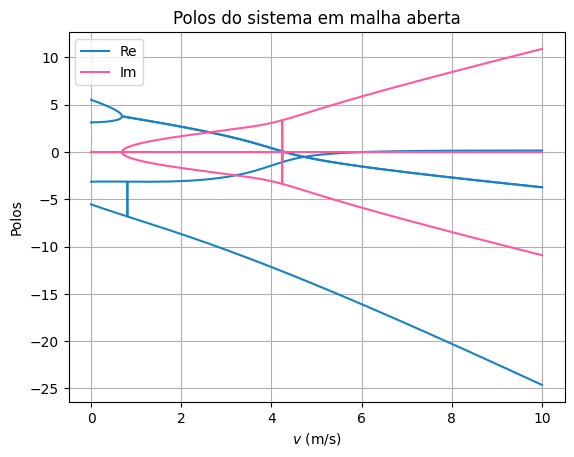

In [27]:
plt.plot(v_range, Reλ_MA, color=cp["blue"], label=['Re', '', '', ''])
plt.plot(v_range, Imλ_MA, color=cp["pink"], label=['Im', '', '', ''])
plt.xlabel(r'$v$ (m/s)')
plt.ylabel('Polos')
plt.title('Polos do sistema em malha aberta')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Polinômio característico do sistema não-controlado (MA)
p = A.charpoly()
p

PurePoly(1.0*lambda**4 + 3.19038797723876*v*lambda**3 + (3.5124784014838*v**2 - 40.3985278400138)*lambda**2 + (3.48482071330788*v**3 - 26.5613984620113*v)*lambda + 300.015050749107 - 8.26676015041851*v**2, lambda, domain='RR[v]')

In [29]:
# Coeficientes do polinômio característico do sistema não-controlado (MA)
a = p.all_coeffs()
a

[1.00000000000000,
 3.19038797723876*v,
 3.5124784014838*v**2 - 40.3985278400138,
 3.48482071330788*v**3 - 26.5613984620113*v,
 300.015050749107 - 8.26676015041851*v**2]

In [30]:
# Matriz Toeplitz triangular W 
W = sp.Matrix([[1, a[1], a[2], a[3]],
               [0, 1, a[1], a[2]],
               [0, 0, 1, a[1]],
               [0, 0, 0, 1]])
W

Matrix([
[1, 3.19038797723876*v, 3.5124784014838*v**2 - 40.3985278400138, 3.48482071330788*v**3 - 26.5613984620113*v],
[0,                  1,                      3.19038797723876*v,    3.5124784014838*v**2 - 40.3985278400138],
[0,                  0,                                       1,                         3.19038797723876*v],
[0,                  0,                                       0,                                          1]])

### Polos em MF

Suponha que se deseje alocar os polos de malha fechada nas posições:
* $s = - 5$,
* $s = - 0.4$ 
* $s = - 1 + 4j$,
* $s = - 1 - 4j$.

In [31]:
# Polos desejados para alocação em MF 
λ = sp.symbols('λ')
p_ = sp.PurePoly((λ + 5) * (λ + 0.4) * ((λ + 1)**2 + 4**2), λ)
a_ = p_.all_coeffs()
a_

[1.00000000000000,
 7.40000000000000,
 29.8000000000000,
 95.8000000000000,
 34.0000000000000]

In [32]:
# Cálculo do ganho pela fórmula de Bass-Gura
k = ((Q_δ*W).inv()).T * (sp.Matrix(a_[1:]) - sp.Matrix(a[1:]))
kn = sp.lambdify((v), k)
k

Matrix([
[                       (7.4 - 3.19038797723876*v)*(1.2535561339698e-9*v**5 + 4684854.31212722*v**3 - 165775.734803635*v)/(449734.43364912*v**6 - 911613.539217444*v**4 + 32257.8663608633*v**2 - 19.9264876996215) + (11.7223104304101 - 331.274758836398*v**2)*(8.26676015041851*v**2 - 266.015050749107)/(1357.58738525329*v**4 - 2703.79633388683*v**2 + 1.69987715458618) + (70.1985278400138 - 3.5124784014838*v**2)*(498.040665151717 - 14074.7254748381*v**2)/(5869.99088531113*v**4 - 11690.7832291711*v**2 + 7.34999714343089) + (-3.48482071330788*v**3 + 26.5613984620113*v + 95.8)*(-4.45272875993e-12*v**5 + 110266.732037376*v**3 - 3901.83926970215*v)/(104012.732858565*v**6 - 210834.235563232*v**4 + 7460.46685630813*v**2 - 4.60851624166996)],
[(7.4 - 3.19038797723876*v)*(-451880.864551395*v**5 + 166432.974746013*v**3 - 5323.49371658317*v)/(449734.43364912*v**6 - 911613.539217444*v**4 + 32257.8663608633*v**2 - 19.9264876996215) + (70.1985278400138 - 3.5124784014838*v**2)*(1357.58738525329*v

In [33]:
# Exemplo de valor numérico para a matriz de ganho k
kn(5)

array([[-0.22042689],
       [ 1.92127647],
       [ 2.86417962],
       [-1.89565703]])

In [34]:
# Matrix de estados em MF
A_c = A - B*k.T
A_cn = sp.lambdify((v), A_c)
A_c

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   0,                                                                                                                                                                                         

In [35]:
np.linalg.eig(A_cn(9))

EigResult(eigenvalues=array([-1. +4.j, -1. -4.j, -0.4+0.j, -5. +0.j]), eigenvectors=array([[ 0.053896  +0.21558398j,  0.053896  -0.21558398j,
        -0.9208504 +0.j        ,  0.18979617+0.j        ],
       [ 0.01065594+0.07785098j,  0.01065594-0.07785098j,
        -0.11875815+0.j        , -0.04938575+0.j        ],
       [-0.91623193+0.j        , -0.91623193-0.j        ,
         0.36834016+0.j        , -0.94898085+0.j        ],
       [-0.32205985-0.0352272j , -0.32205985+0.0352272j ,
         0.04750326+0.j        ,  0.24692874+0.j        ]]))

### Simulação do sistema controlado

In [36]:
def bike_PP_sim(v):
    bike_PP_MF = ct.ss(A_cn(v), E,
                         -kn(v).T, [[0]])
    ts = np.linspace(0, 50, 1001)
    w = np.linspace(0.1, 0.1, 1001)
    x0 = [0.2, 0.0, 0.0, 0.0]
    t, y, x = ct.forced_response(bike_PP_MF, U=0, T=ts, X0=x0, return_x=True)
    return (t, y, x)
    

In [37]:
def update_plot_sim(v):
    t, u, x = bike_PP_sim(v)
    fig, (state, control_input) = plt.subplots(
        2, 1, figsize=(5, 7), sharex=True)
    
    state.plot(t, 180/np.pi * x[0, :],
               color=cp['red'], label=r'$\phi \ (\degree)$ ')
    state.plot(t, 180/np.pi * x[1, :],
               color=cp['blue'], label=r'$\delta \ (\degree)$')
    # state.plot(t, x[:, 2], color='black', label=r'$x_3$')
    # state.set_ylabel(r'(rad)')
    state.set_xlabel(r'$t$ (s)')
    state.legend()

    control_input.plot(t, u, color=cp['orange'], label=r'$\tau_\delta$ (N m)')
    # control_input.set_ylabel(r'(N m)')
    control_input.set_xlabel(r'$t$ (s)')
    control_input.legend()


# Create sliders
v_slider = widgets.FloatSlider(
    value=5.0, min=0.0, max=10.0, step=0.01, description=r'v:')

# Create the interactive plot
interactive_plot_sim = interactive(
    update_plot_sim, v=v_slider)
output_sim = interactive_plot_sim.children[-1]
output_sim.layout.height = '600px'
interactive_plot_sim

interactive(children=(FloatSlider(value=5.0, description='v:', max=10.0, step=0.01), Output(layout=Layout(heig…

### Resposta em frequência do sistema em malha fechada (via diagrama de Bode)

In [38]:
def update_bode(v):
    bike_PP_MF_U = ct.ss(A_cn(v), E,
                          -kn(v).T, [[0]])
    bike_PP_MF_φ = ct.ss(A_cn(v), E,
                          np.array([[1, 0, 0, 0]]), [[0]])
    bike_PP_MF_δ = ct.ss(A_cn(v), E,
                          np.array([[0, 1, 0, 0]]), [[0]])
    plt.figure()
    mag_U, phase_U, omega_U = ct.bode_plot(
        bike_PP_MF_U, omega=np.linspace(0.1, 20, 201), color=cp['orange'], dB=True)
    mag_φ, phase_φ, omega_φ = ct.bode_plot(
        bike_PP_MF_φ, omega=np.linspace(0.1, 20, 201), color=cp['red'], dB=True)
    mag_δ, phase_δ, omega_δ = ct.bode_plot(
        bike_PP_MF_δ, omega=np.linspace(0.1, 20, 201), color=cp['blue'], dB=True)
    
    mag_ax = plt.subplot(2, 1, 1)  # magnitude plot
    phase_ax = plt.subplot(2, 1, 2)  # phase plot

    mag_ax.set_ylim([-60, 40])  # y-limits (magnitude plot)
    phase_ax.set_ylim([-720, 0])  # y-limits (phase plot)
    plt.legend([r'$τ_δ/τ_φ$', r'$φ/τ_φ$', r'$δ/τ_φ$'])

# Create the interactive plot
interactive_bode = interactive(
    update_bode, v=v_slider)
output = interactive_bode.children[-1]
output.layout.height = '450px'
interactive_bode

interactive(children=(FloatSlider(value=5.0, description='v:', max=10.0, step=0.01), Output(layout=Layout(heig…

## Síntese de um Regulador Linear Quadrático (LQR)

In [39]:
Q = np.diag([1, 0.2, 10, 2])

def bike_LQR(v, R):
    k_LQR, _, poles = ct.lqr(An(v), Bn, Q, R) 
    A_c_LQR = An(v) - Bn @ k_LQR
    return (A_c_LQR, k_LQR, poles)

### Simulação do sistema controlado

In [40]:
def bike_LQR_sim(v, R):
    A_c_LQR, k_LQR, _ = bike_LQR(v, R)
    bike_LQR_MF = ct.ss(A_c_LQR, En,
                        -k_LQR, [[0]])
    ts = np.linspace(0, 50, 1001)
    w = np.linspace(0.1, 0.1, 1001)
    x0 = [0.2, 0.0, 0.0, 0.0]
    t, y, x = ct.forced_response(bike_LQR_MF, T=ts, X0=x0, return_x=True)
    return (t, y, x)

In [41]:
def update_plot_sim(v, lR):
    t, u, x = bike_LQR_sim(v, 10**lR)
    fig, (state, control_input) = plt.subplots(
        2, 1, figsize=(5, 7), sharex=True)

    state.plot(t, 180/np.pi * x[0, :],
               color=cp['red'], label=r'$\phi \ (\degree)$ ')
    state.plot(t, 180/np.pi * x[1, :],
               color=cp['blue'], label=r'$\delta \ (\degree)$')
    # state.plot(t, x[:, 2], color='black', label=r'$x_3$')
    # state.set_ylabel(r'(rad)')
    state.set_xlabel(r'$t$ (s)')
    state.legend()

    control_input.plot(t, u, color=cp['orange'],
                       label=r'$\tau_\delta$ (N m)')
    # control_input.set_ylabel(r'(N m)')
    control_input.set_xlabel(r'$t$ (s)')
    control_input.legend()


# Create sliders
v_slider = widgets.FloatSlider(
    value=5.0, min=0.0, max=10.0, step=0.01, description=r'v:')
lR_slider = widgets.FloatSlider(
    value=0, min=-2, max=2, step=0.5, description=r'log R:')

# Create the interactive plot
interactive_plot_sim = interactive(
    update_plot_sim, v=v_slider, lR = lR_slider)
output_sim = interactive_plot_sim.children[-1]
output_sim.layout.height = '600px'
interactive_plot_sim

interactive(children=(FloatSlider(value=5.0, description='v:', max=10.0, step=0.01), FloatSlider(value=0.0, de…

### Resposta em frequência do sistema em malha fechada

In [42]:
def update_bode(v, lR):
    A_c_LQR, k_LQR, _ = bike_LQR(v, 10**lR)
    bike_LQR_MF_U = ct.ss(A_c_LQR, E,
                          -k_LQR, [[0]])
    bike_LQR_MF_φ = ct.ss(A_c_LQR, E,
                          np.array([[1, 0, 0, 0]]), [[0]])
    bike_LQR_MF_δ = ct.ss(A_c_LQR, E,
                          np.array([[0, 1, 0, 0]]), [[0]])
    plt.figure()
    mag_U, phase_U, omega_U = ct.bode_plot(
        bike_LQR_MF_U, omega=np.linspace(0.1, 20, 201), color=cp['orange'], dB=True)
    mag_φ, phase_φ, omega_φ = ct.bode_plot(
        bike_LQR_MF_φ, omega=np.linspace(0.1, 20, 201), color=cp['red'], dB=True)
    mag_δ, phase_δ, omega_δ = ct.bode_plot(
        bike_LQR_MF_δ, omega=np.linspace(0.1, 20, 201), color=cp['blue'], dB=True)

    mag_ax = plt.subplot(2, 1, 1)  # magnitude plot
    phase_ax = plt.subplot(2, 1, 2)  # phase plot

    mag_ax.set_ylim([-80, 40])  # y-limits (magnitude plot)
    phase_ax.set_ylim([-450, 0])  # y-limits (phase plot)
    plt.legend([r'$τ_δ/τ_φ$', r'$φ/τ_φ$', r'$δ/τ_φ$'])

# Create sliders
v_slider = widgets.FloatSlider(
    value=5.0, min=0.0, max=10.0, step=0.01, description=r'v:')
lR_slider = widgets.FloatSlider(
    value=0, min=-2, max=2, step=0.5, description=r'log R:')

# Create the interactive plot
interactive_bode = interactive(
    update_bode, v=v_slider, lR=lR_slider)
output = interactive_bode.children[-1]
output.layout.height = '450px'
interactive_bode

interactive(children=(FloatSlider(value=5.0, description='v:', max=10.0, step=0.01), FloatSlider(value=0.0, de…

### Polos e zeros 

In [43]:
def update_pzmap(v, lR):
    A_c_LQR, _, _ = bike_LQR(v, 10**lR)
    bike_LQR_MA_φ = ct.ss(An(v), E,
                          np.array([[1, 0, 0, 0]]), [[0]])
    bike_LQR_MF_φ = ct.ss(A_c_LQR, E,
                          np.array([[1, 0, 0, 0]]), [[0]])

    plt.figure()
    poles_MA, zeros_MA = ct.pzmap(bike_LQR_MA_φ, plot=True)
    plt.legend([r'MA'])

    plt.figure()
    poles_MF, zeros_MF = ct.pzmap(bike_LQR_MF_φ, plot=True)
    plt.legend([r'MF'])


# Create sliders
v_slider = widgets.FloatSlider(
    value=5.0, min=0.0, max=10.0, step=0.01, description=r'v:')
lR_slider = widgets.FloatSlider(
    value=0, min=-2, max=2, step=0.5, description=r'log R:')

# Create the interactive plot
interactive_pzmap = interactive(
    update_pzmap, v=v_slider, lR=lR_slider)
output = interactive_pzmap.children[-1]
output.layout.height = '920px'
interactive_pzmap

interactive(children=(FloatSlider(value=5.0, description='v:', max=10.0, step=0.01), FloatSlider(value=0.0, de…

### Seguidor LQ

In [44]:
Q = np.diag([1, 0.2, 10, 2])
R = 1.0

ts = np.linspace(0, 120, 1201)
# refs = np.array([-np.heaviside(100-t, 0) for t in ts])
refs = np.array([np.sign(np.mod(t, 50)-25) * np.heaviside(100-t, 0) for t in ts])
r_φ = - 8*np.pi/180 * refs
r_δ = - 16*np.pi/180 * refs

K_lq, P_lq, poles = ct.lqr(An(5.0), Bn, Q, R)
A_c_lq = np.array(An(5.0) - Bn @ K_lq)

η_ss = ct.ss(-A_c_lq, -Q,
            np.eye(4), np.zeros((4,4)))

x_ref = np.block([[r_φ[::-1]], [r_δ[::-1]], [0*ts], [0*ts]])
η0 = P_lq @ np.array([[r_φ[-1]], [r_δ[-1]], [0], [0]])

ts_i, η = ct.forced_response(η_ss, U=x_ref, T=ts[::-1], X0=η0)

sys_c_ss = ct.ss(A_c_lq, (Bn @ Bn.T)/R, 
                 -K_lq, Bn.T/R)

ts_d, u_lq, x_lq = ct.forced_response(sys_c_ss, U=η[:, ::-1], T=ts,
                                      return_x=True)

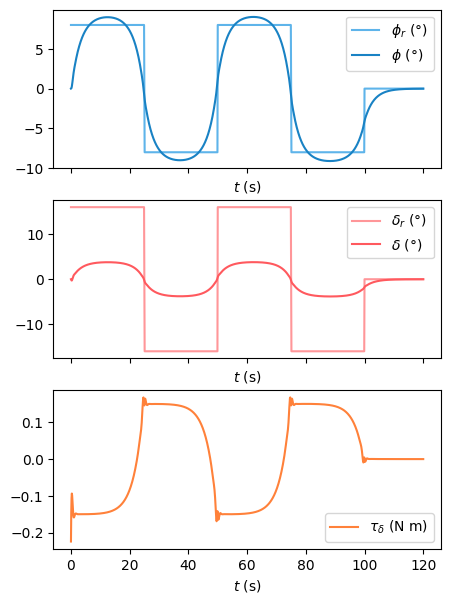

In [45]:
fig, (statephi, statedelta, control_input) = plt.subplots(
        3, 1, figsize=(5, 7), sharex=True)

statephi.plot(ts, 180/np.pi * r_φ,
            color=cp['lblue'], label=r'$\phi_r \ (\degree)$ ')
statephi.plot(ts, 180/np.pi * x_lq[0, :],
            color=cp['blue'], label=r'$\phi \ (\degree)$')
statephi.set_xlabel(r'$t$ (s)')
statephi.legend()

statedelta.plot(ts, 180/np.pi * r_δ,
              color=cp['lred'], label=r'$\delta_r \ (\degree)$ ')
statedelta.plot(ts, 180/np.pi * x_lq[1, :],
              color=cp['red'], label=r'$\delta \ (\degree)$')
statedelta.set_xlabel(r'$t$ (s)')
statedelta.legend()

control_input.plot(ts, u_lq[0, :], color=cp['orange'],
                    label=r'$\tau_\delta$ (N m)')
# control_input.set_ylabel(r'(N m)')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()